In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2024-01-04 20:13:17.976229: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-04 20:13:18.005573: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 20:13:18.005604: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 20:13:18.006438: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 20:13:18.011493: I tensorflow/core/platform/cpu_feature_guar

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[100]

[1,
 367,
 1394,
 169,
 65,
 87,
 209,
 30,
 306,
 228,
 10,
 803,
 305,
 96,
 5,
 196,
 15,
 10,
 523,
 2,
 3006,
 293,
 484,
 2,
 1440,
 5825,
 8,
 145,
 7,
 10,
 1670,
 6,
 10,
 294,
 517,
 237,
 2,
 367,
 8042,
 7,
 2477,
 1177,
 483,
 1440,
 5825,
 8,
 367,
 1394,
 4,
 169,
 387,
 66,
 209,
 30,
 2344,
 652,
 1496,
 9,
 209,
 30,
 2564,
 228,
 10,
 803,
 305,
 96,
 5,
 196,
 15,
 51,
 36,
 1457,
 24,
 1345,
 5,
 4,
 196,
 150,
 10,
 523,
 320,
 64,
 992,
 6373,
 13,
 367,
 190,
 297,
 64,
 85,
 1692,
 6,
 8656,
 122,
 9,
 36,
 1457,
 24,
 269,
 4753,
 27,
 367,
 212,
 114,
 45,
 30,
 3292,
 7,
 126,
 2203,
 13,
 367,
 6,
 1818,
 4,
 169,
 65,
 96,
 28,
 432,
 23,
 189,
 1254,
 4,
 9725,
 320,
 5,
 196,
 15,
 10,
 523,
 25,
 730,
 190,
 57,
 64,
 6,
 9953,
 2016,
 6373,
 7,
 2,
 122,
 1440,
 5825,
 8,
 269,
 4753,
 1217,
 7,
 608,
 2203,
 30,
 3292,
 1440,
 5825,
 8,
 43,
 339,
 43,
 231,
 9,
 667,
 1820,
 126,
 212,
 4197,
 21,
 1709,
 249,
 311,
 13,
 260,
 489,
 9,
 65,
 4753,
 

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[0]

3

In [8]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#This is built-in way to do this in Keras as:

# from keras.utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [10]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#Using softmax activation function means network will output probability distribution

2024-01-04 20:13:19.930011: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-04 20:13:20.044935: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
trained_model = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                          validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 2.7688 - accuracy: 0.4965 - val_loss: 1.9208 - val_accuracy: 0.5810
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.6407 - accuracy: 0.6552 - val_loss: 1.4737 - val_accuracy: 0.6830
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.2685 - accuracy: 0.7285 - val_loss: 1.2349 - val_accuracy: 0.7310
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0245 - accuracy: 0.7799 - val_loss: 1.1013 - val_accuracy: 0.7500
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8452 - accuracy: 0.8166 - val_loss: 1.0078 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7046 - accuracy: 0.8473 - val_loss: 0.9598 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5873 - accuracy: 0.8727 - val_loss: 0.9163 - val_accuracy: 0.7980
Epoch 8/20
16

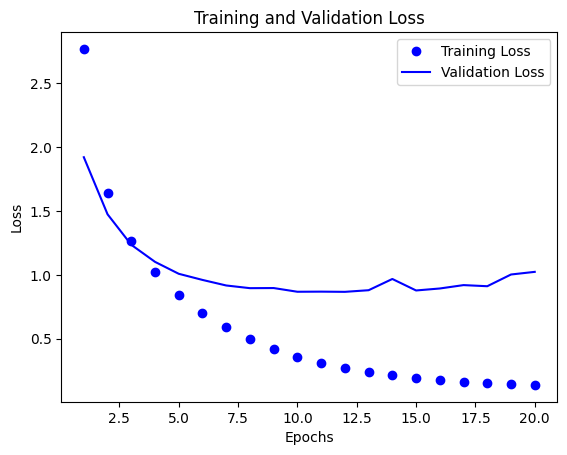

In [18]:
import matplotlib.pyplot as plt

loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

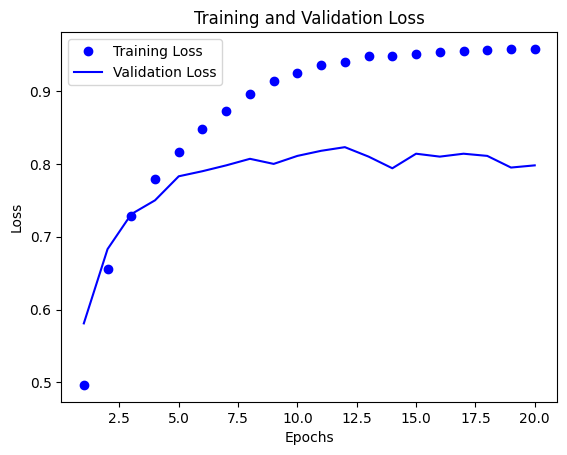

In [21]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Loss')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

trained_model = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512,
                          validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 22ms/step - loss: 2.6421 - accuracy: 0.5396 - val_loss: 1.7544 - val_accuracy: 0.6390
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.4914 - accuracy: 0.6892 - val_loss: 1.3509 - val_accuracy: 0.7060
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.1559 - accuracy: 0.7492 - val_loss: 1.1833 - val_accuracy: 0.7220
Epoch 4/9
16/16 [==============================] - 0s 19ms/step - loss: 0.9503 - accuracy: 0.7923 - val_loss: 1.0738 - val_accuracy: 0.7560
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.7848 - accuracy: 0.8240 - val_loss: 0.9990 - val_accuracy: 0.7810
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6565 - accuracy: 0.8542 - val_loss: 0.9493 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5443 - accuracy: 0.8820 - val_loss: 0.9096 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

In [28]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 1ms/step - loss: 0.9418 - accuracy: 0.7881


[0.9417752027511597, 0.7880676984786987]

In [29]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [31]:
predictions.shape

(2246, 46)

In [32]:
np.sum(predictions[0])

1.0

In [33]:
np.argmax(predictions[0])

3

Another way of encoding the labels would be to cast them as integer tensor. And while compiling `sparse_categorical_crossentropy` must be used as a loss function. It is same as `categorical_crossentropy`, it just has different interface.

```bash
y_train = np.array(train_labels)
y_test = np.array(test_labels)
```